## Importing the libraries


In [271]:
import warnings
warnings.filterwarnings("ignore")

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [273]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Importing data

In [274]:
app_data = pd.read_csv("C:\\Users\\shrivaa7\\Desktop\\Personal\\Upgrad\\CaseStudy\\application_data.csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [275]:
# Checking number of rows and columns in the dataset
app_data.shape

(307511, 122)

#### Data Cleaning

In [276]:
# Checking for columns where null percentage is considerably high(>30)
columns_null_percentage = (app_data.isnull().sum() / len(app_data.index)) * 100
columns_null_percentage_greater_than_30 = columns_null_percentage[columns_null_percentage.values > 30]
columns_null_percentage_greater_than_30

OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50

In [277]:
# no of columns to be removed because of large null values
len(columns_null_percentage_greater_than_30.index)

50

#### Data cleaning: Dropping irrelevant columns

In [278]:
# Dropping columns where null values percentage is greater than 30%
list_of_columns_to_drop = list(columns_null_percentage_greater_than_30.index)
app_data.drop(list_of_columns_to_drop, axis=1, inplace = True)


In [279]:
# no of columns left after removing the irrelevant columns(null percentage greater than 30)
app_data.shape

(307511, 72)

In [280]:
#checking the null percentage for rest of the columns
columns_null_percentage = (app_data.isnull().sum() / len(app_data.index)) * 100
columns_null_percentage_greater_than_0 = columns_null_percentage[columns_null_percentage.values > 0]
columns_null_percentage_greater_than_0

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

#### Data Cleaning: Imputing values

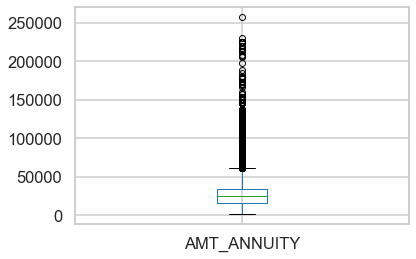

In [281]:
# Analyze column 'AMT_ANNUITY'
# To detect if there is any outlier
app_data.boxplot(column = 'AMT_ANNUITY')                 

In [282]:
app_data.AMT_ANNUITY.describe()    

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

####  Observation from the above plot
    1) Annuity amount depends on the amount taken for loan. 
    2) Most of the annuity amount lies within 60000 approx.
    3) Null annuity amount probably means that customer has not started settling the loans
    4) Null over here actually has a meaning; so we can impute null values with 0

In [283]:
app_data.AMT_ANNUITY.fillna(0.0, inplace = True)

In [284]:
# No more null values
app_data.AMT_ANNUITY.isnull().sum()

0

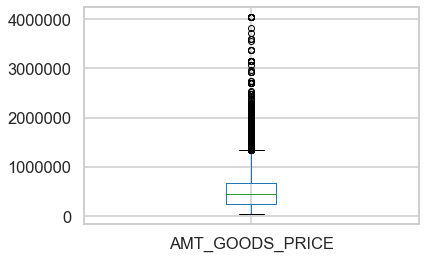

In [285]:
app_data.boxplot(column = 'AMT_GOODS_PRICE')     

In [286]:
app_data.AMT_GOODS_PRICE.describe().apply(lambda x: format(x, 'f'))

count     307233.000000
mean      538396.207429
std       369446.460540
min        40500.000000
25%       238500.000000
50%       450000.000000
75%       679500.000000
max      4050000.000000
Name: AMT_GOODS_PRICE, dtype: object

##### Observation from the above plot
    1) The missing values over here cannot be imputed with another value int he AMT_GOODS_PRICE column as it will be wild guess.Rather
    2) Generally the loan taken by the customer is 80% of the total amount of his goods.
    3) But to make it simple we can directly impute the corresponding amount from the AMT_CREDIT column

In [287]:
# Again there are higher values but for the same reason as before we can impute missing values with mean 
app_data.AMT_GOODS_PRICE.fillna(app_data.AMT_CREDIT, inplace = True)

In [288]:
# no more null values
app_data.AMT_GOODS_PRICE.isnull().sum()

0

In [289]:
app_data.NAME_TYPE_SUITE.value_counts(normalize = True)


Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [290]:
# Imputing null values with the most common value
app_data.NAME_TYPE_SUITE.fillna('Unaccompanied', inplace = True)

#### Data Cleaning: Removing records where columns have lower percentage of null values

In [291]:
column_having_null_values = (app_data.isnull().sum() / len(app_data.index))
column_having_null_values[column_having_null_values.values > 0]

CNT_FAM_MEMBERS               0.000007
EXT_SOURCE_2                  0.002146
EXT_SOURCE_3                  0.198253
OBS_30_CNT_SOCIAL_CIRCLE      0.003320
DEF_30_CNT_SOCIAL_CIRCLE      0.003320
OBS_60_CNT_SOCIAL_CIRCLE      0.003320
DEF_60_CNT_SOCIAL_CIRCLE      0.003320
DAYS_LAST_PHONE_CHANGE        0.000003
AMT_REQ_CREDIT_BUREAU_HOUR    0.135016
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
dtype: float64

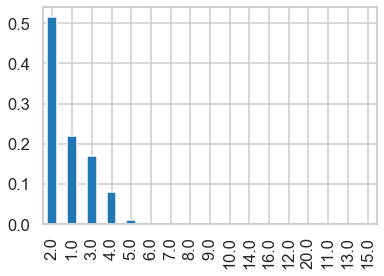

In [292]:
#Analyze column CNT_FAM_MEMBERS
app_data.CNT_FAM_MEMBERS.value_counts(normalize = True).plot.bar()

In [293]:
app_data.CNT_FAM_MEMBERS.fillna(2.0, inplace = True)

In [294]:
# Removing records where columns have lower percentage of null values¶app_data = app_data[~app_data.CNT_FAM_MEMBERS.isnull()]
app_data = app_data[~app_data.EXT_SOURCE_2.isnull()]
app_data = app_data[~app_data.EXT_SOURCE_3.isnull()]
app_data = app_data[~app_data.OBS_30_CNT_SOCIAL_CIRCLE.isnull()]
app_data = app_data[~app_data.DEF_30_CNT_SOCIAL_CIRCLE.isnull()]
app_data = app_data[~app_data.OBS_60_CNT_SOCIAL_CIRCLE.isnull()]
app_data = app_data[~app_data.DEF_60_CNT_SOCIAL_CIRCLE.isnull()]
app_data = app_data[~app_data.DAYS_LAST_PHONE_CHANGE.isnull()]
app_data = app_data[~app_data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull()]
app_data = app_data[~app_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull()]
app_data = app_data[~app_data.AMT_REQ_CREDIT_BUREAU_WEEK.isnull()]
app_data = app_data[~app_data.AMT_REQ_CREDIT_BUREAU_MON.isnull()]
app_data = app_data[~app_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull()]
app_data = app_data[~app_data.AMT_REQ_CREDIT_BUREAU_YEAR.isnull()]


In [295]:
# no more columns are having any null values
app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [296]:
# As we have removed recordswhere column values are null therefore the index was not continous
app_data.index = range(len(app_data.index))


In [297]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
3,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
4,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [298]:
# remove columns named FLAG_DOCUMENT as these dont have any role in analysis
for col in app_data.columns:
    if 'FLAG_DOCUMENT_' in col:
        del app_data[col]

In [299]:
app_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

#### Univariate Analysis

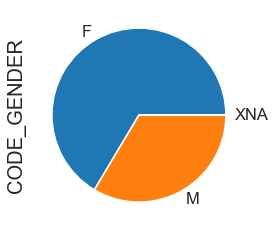

In [300]:
# Analyze column CODE_GENDER
app_data.CODE_GENDER.value_counts(normalize = True).plot.pie()


In [301]:
# Converting gender column to string
app_data['CODE_GENDER'] = app_data.CODE_GENDER.astype(str)
app_data['NAME_TYPE_SUITE'] = app_data.NAME_TYPE_SUITE.astype(str)

In [302]:
# No of females is significantly higher wrt to male so we can impute XNA with F
app_data.loc[app_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app_data['CODE_GENDER'].value_counts()

F    163033
M     82336
Name: CODE_GENDER, dtype: int64

In [303]:
# Analyze column ORGANIZATION_TYPE

app_data.ORGANIZATION_TYPE.value_counts().sort_values()


Industry: type 8             16
Trade: type 5                38
Industry: type 13            44
Trade: type 4                52
Religion                     68
Industry: type 6             86
Industry: type 10            92
Transport: type 1           171
Cleaning                    201
Legal Services              242
Mobile                      258
Trade: type 1               275
Industry: type 12           297
Culture                     304
Realtor                     311
Advertising                 348
Industry: type 2            385
Insurance                   464
Telecom                     480
Emergency                   482
Trade: type 6               514
Industry: type 5            517
Industry: type 4            699
Hotel                       772
Electricity                 805
Industry: type 1            850
Transport: type 3           871
Industry: type 7           1089
University                 1102
Services                   1210
Restaurant                 1361
Trade: t

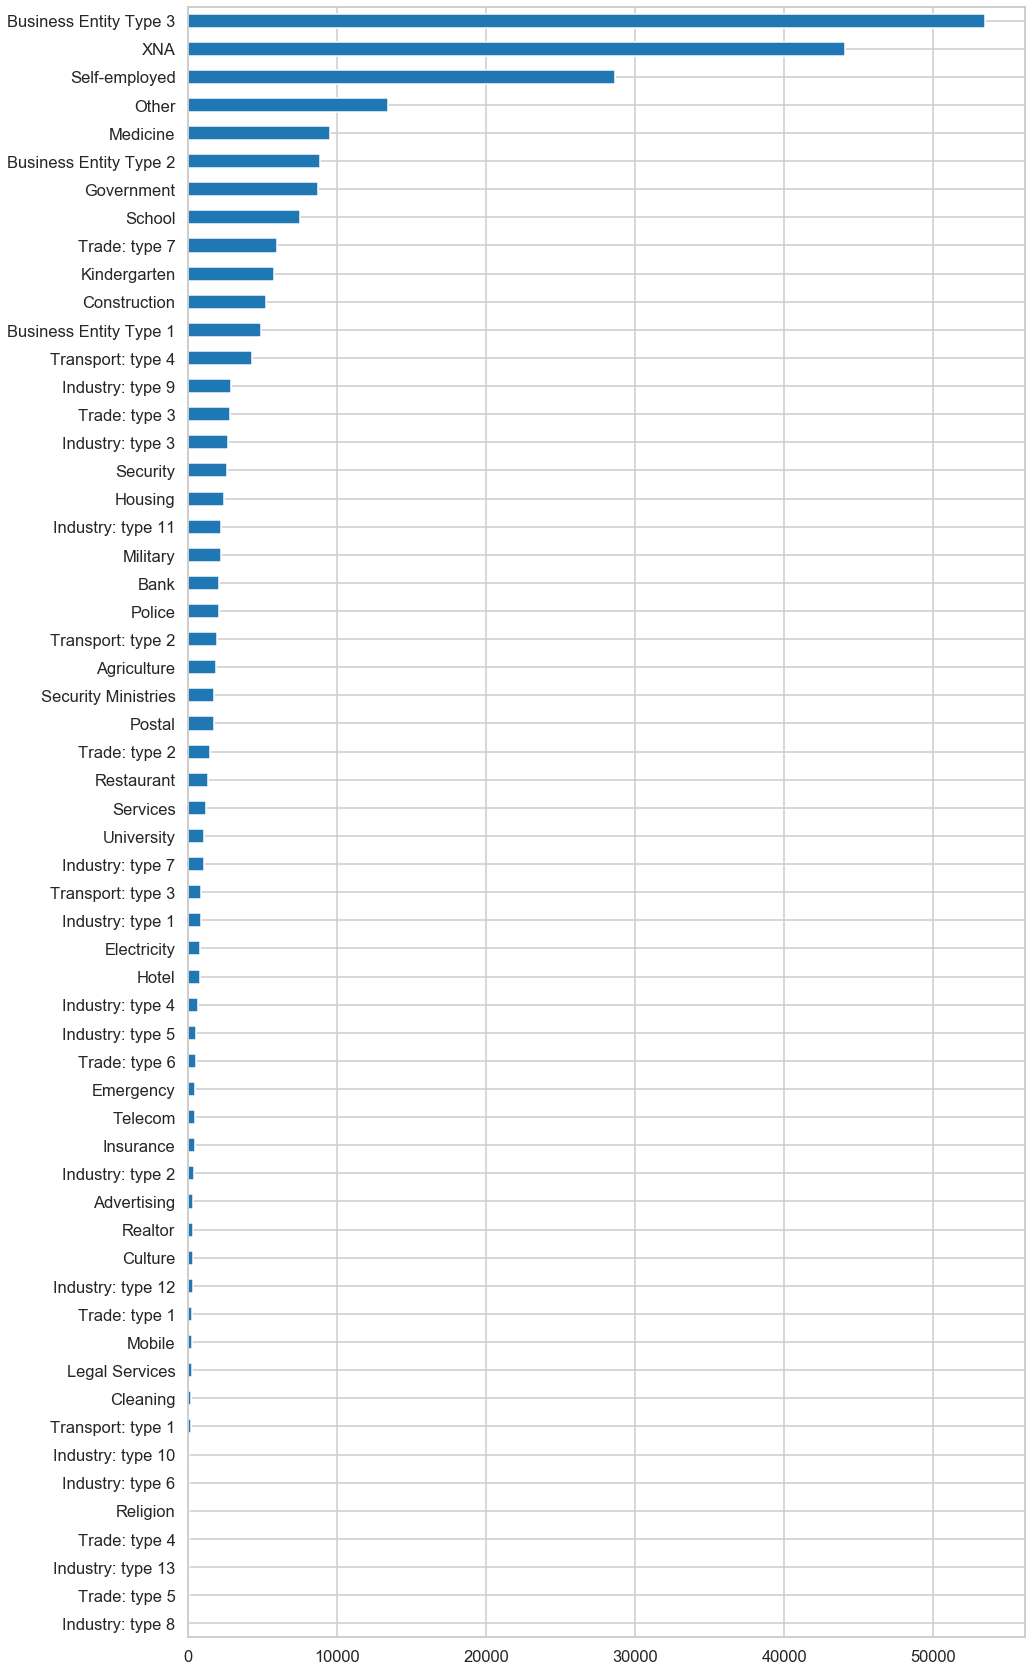

In [304]:
plt.figure(figsize=(15,30))

app_data.ORGANIZATION_TYPE.value_counts().sort_values().plot.barh()


#### There are quite a few XNA's; we cannot impute these XNA's with any values as there is no clear standout organization type.
     We can impute null values 'Other'

In [305]:
app_data.ORGANIZATION_TYPE.fillna('Other', inplace = True)


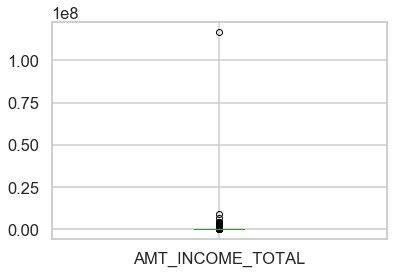

In [306]:
# check numerical values for outliers. There exists a clear cut outlier as visible from the box plot
app_data.boxplot(column = 'AMT_INCOME_TOTAL') 


In [307]:
#Analysing column AMT_INCOME_TOTAL
app_data.AMT_INCOME_TOTAL.describe()

count    2.453690e+05
mean     1.718925e+05
std      2.569687e+05
min      2.610000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [308]:
app_data.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.8, 0.9, 0.95, .99])

0.50    157500.0
0.70    198000.0
0.80    225000.0
0.90    270000.0
0.95    337500.0
0.99    495000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [309]:
# Treating outlier using z-score method
app_data['AMT_INCOME_TOTAL'] = app_data.AMT_INCOME_TOTAL.where(np.abs(stats.zscore(app_data.AMT_INCOME_TOTAL)) < 3) 

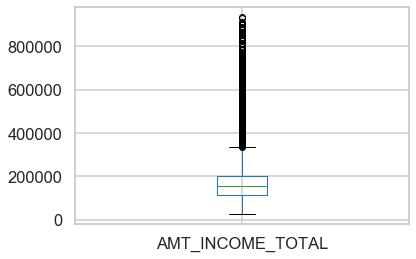

In [310]:
# outlier removed
app_data.boxplot(column = 'AMT_INCOME_TOTAL') 

In [311]:
# Analysing column AMT_CREDIT
app_data.AMT_CREDIT.describe()
 

count    2.453690e+05
mean     6.087395e+05
std      4.049686e+05
min      4.500000e+04
25%      2.750400e+05
50%      5.212800e+05
75%      8.140410e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [312]:
app_data.AMT_CREDIT.quantile([0.5, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99])

0.50     521280.0
0.70     755190.0
0.80     900000.0
0.90    1164667.5
0.95    1350000.0
0.98    1687266.0
0.99    1885536.0
Name: AMT_CREDIT, dtype: float64

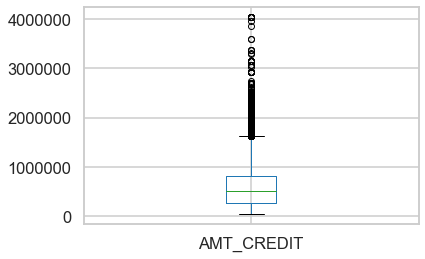

In [313]:
app_data.boxplot(column = 'AMT_CREDIT') 


#### Observation from the above plot
    Doesnt seem to be an outlier here; no treatment required

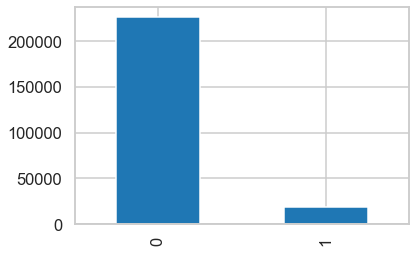

In [314]:
# There's a clear imbalance between target type 1 and 0
app_data.TARGET.value_counts().plot.bar()


In [315]:
app_data.head()

#Imbalance Percentage: Target = 1
(len(app_data[app_data['TARGET'] == 1]) / len(app_data.index)) * 100

7.778488725144578

In [316]:
#Imbalance Percentage: Target = 0
(len(app_data[app_data['TARGET'] == 0]) / len(app_data.index)) * 100

92.22151127485542

In [317]:
app_data['AMT_INCOME_TOTAL'].describe().apply(lambda x: format(x, 'f'))

count    245155.000000
mean     170232.116260
std       90004.045199
min       26100.000000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      936000.000000
Name: AMT_INCOME_TOTAL, dtype: object

In [318]:
# creating bins for AMT_INCOME_TOTAL as the variation is quite huge
def create_bins(df, col):
    bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
    slot = ['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000-300000',
            '300000-350000','350000-400000','400000-450000', '450000-500000', '500000-above']

    app_data['AMT_INCOME_RANGE'] = pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [319]:
def univariate_plot(df, column_name, title, hue = None):

    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    sns.countplot(data = df, x=column_name, order=df[column_name].value_counts().index, hue = hue, palette='magma')

In [320]:
create_bins(df = 'app_data', col = 'AMT_INCOME_RANGE')

In [321]:
app_data_target_1 = app_data[app_data['TARGET'] == 1]
app_data_target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-250000
19,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,-161.0,0.0,0.0,0.0,0.0,2.0,2.0,100000-150000
30,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0,200000-250000
31,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,1,0,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,-1480.0,0.0,0.0,0.0,0.0,0.0,2.0,100000-150000
63,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,-4199,1,0,0,1,0,0,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000


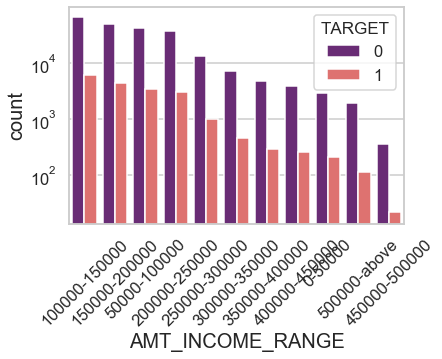

In [322]:
univariate_plot(df = app_data,column_name='AMT_INCOME_RANGE',title='Distribution of income range',hue='TARGET')


#### Observation from the above plot
1) Income range 100000-150000 has the most loan settlers and also has the most defaulters

2) The ratio of loan settlers wrt loan defaulters is quite high in the income range 450000 – 500000. 

3) Bank should target customers in this income range for good loans


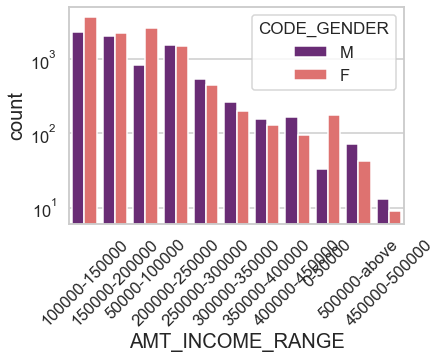

In [323]:
univariate_plot(df = app_data_target_1,column_name='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

##### Observation from the above plot
#1 - In general: number of defaulters on the male side is more in most of the income ranges
#2 - There's an exception from the general trend in the income range 400000-450000
#3 - Very Less defaulters in the income range 450000-500000

In [324]:
app_data_target_1.NAME_INCOME_TYPE.value_counts()

Working                 11638
Commercial associate     4148
Pensioner                2277
State servant            1023
Name: NAME_INCOME_TYPE, dtype: int64

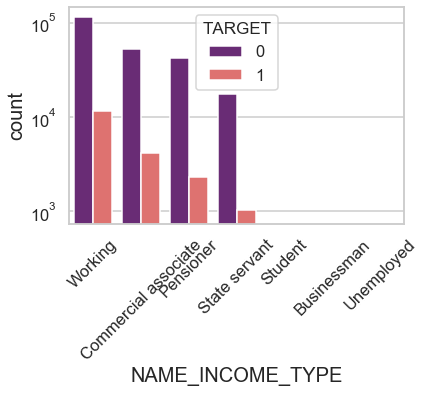

In [325]:
univariate_plot(df = app_data,column_name='NAME_INCOME_TYPE',title='Distribution of Income type',hue='TARGET')

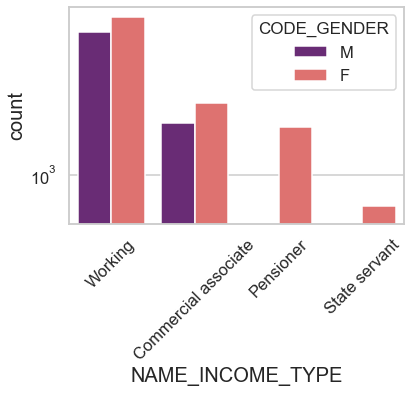

In [326]:
# Plotting for Income type
univariate_plot(df = app_data_target_1,column_name='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

#### Conclusion from the above graph
         1) In each of the category of income type female defaulters are more than the male defaulters
         2) There's no male defaulter in State servant category
         
    

In [327]:
app_data_target_1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         17911
Revolving loans     1175
Name: NAME_CONTRACT_TYPE, dtype: int64

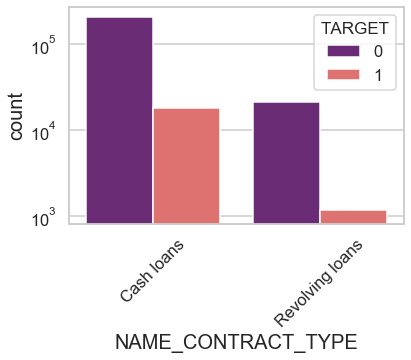

In [328]:
univariate_plot(app_data,column_name ='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='TARGET')

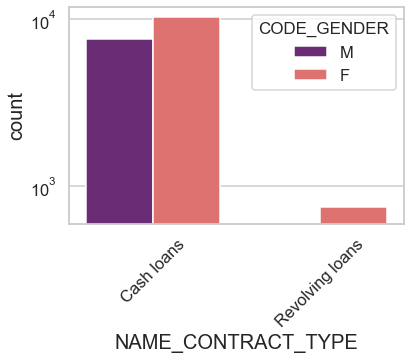

In [329]:
univariate_plot(app_data_target_1,column_name ='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

#### Conclusion from the above graph
        1) Female defaulters are more in Cash loans category
        2) No male defaulters in Revolving loans category

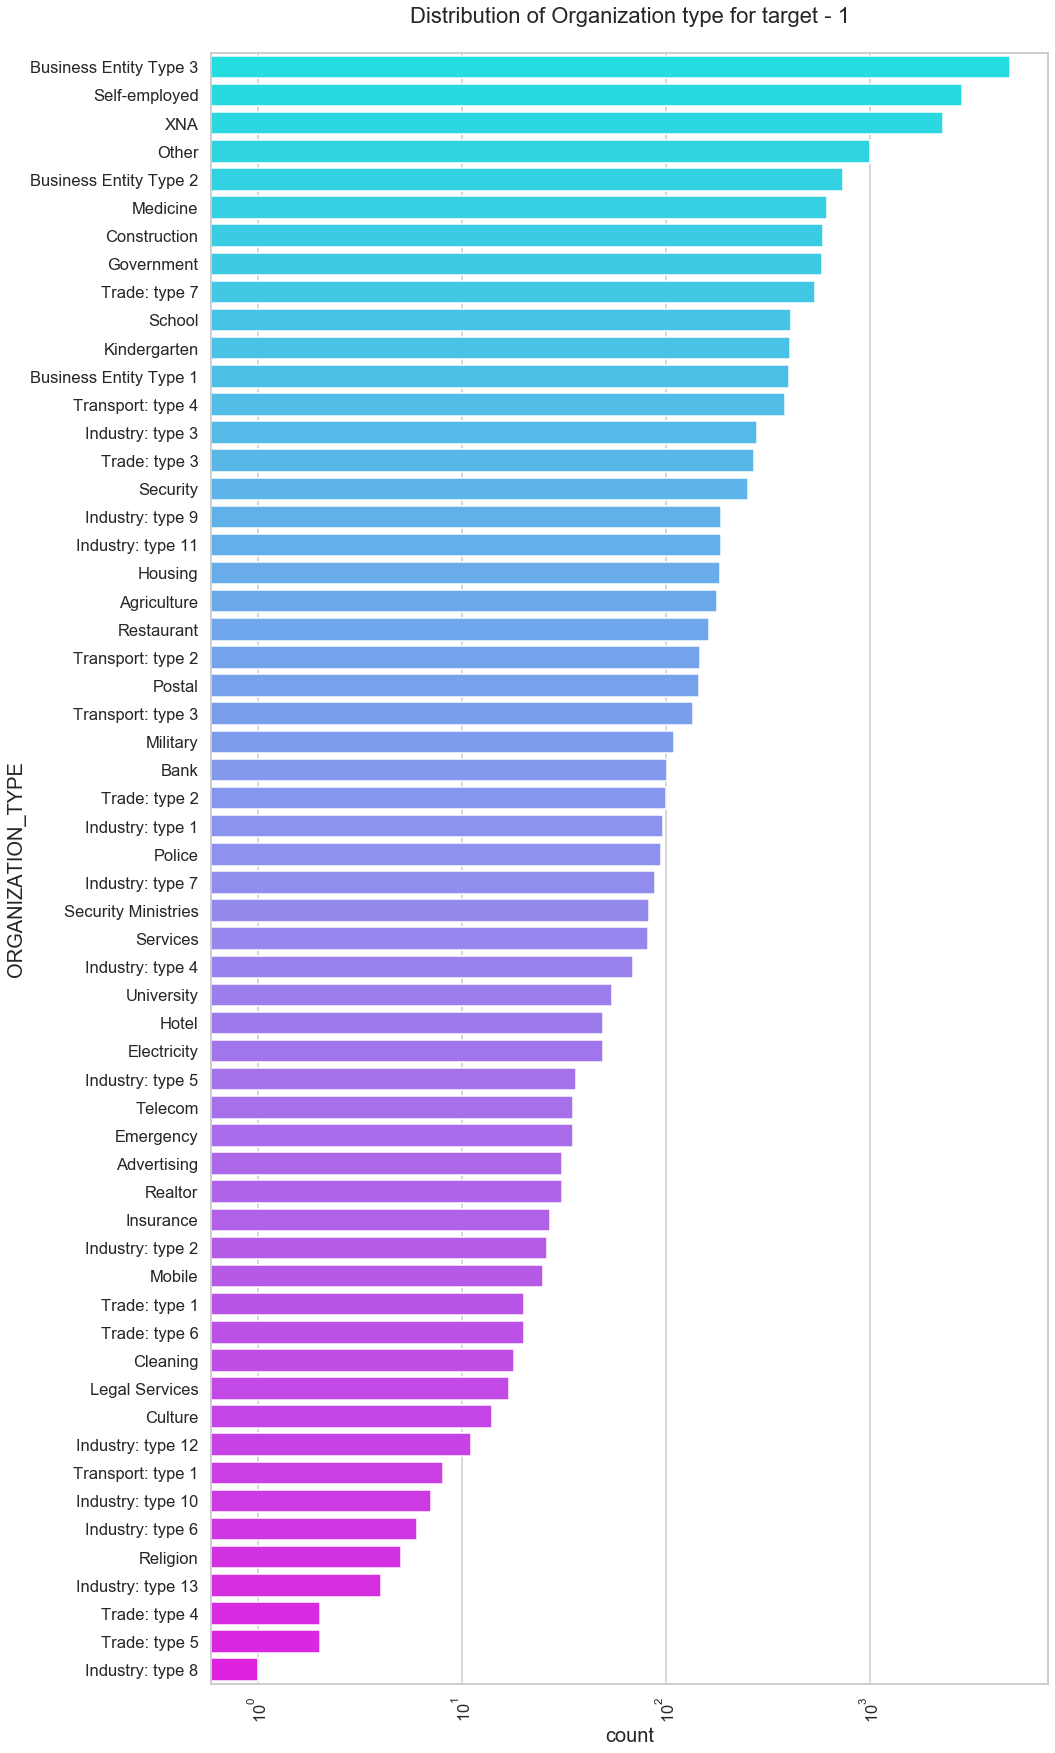

In [330]:
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.title("Distribution of Organization type for target - 1")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=app_data_target_1,y='ORGANIZATION_TYPE',order=app_data_target_1['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

#### Conclusion from the above graph
    1) Most no of defaulters are in the Organization Type - Business Entity Type 3
    2) Least no of defaulters are in the Organization Type - Industry Type - 8

In [331]:
app_data_target_0 = app_data[app_data['TARGET'] == 0]
app_data_target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,50000-100000
3,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0,150000-200000
4,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0,350000-400000
5,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-150000


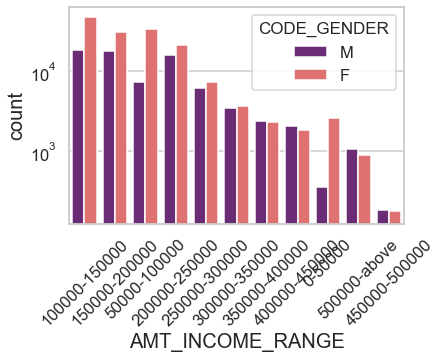

In [332]:
univariate_plot(df = app_data_target_0,column_name='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

#### Observation from the above plot
        1) No of male customers who made timely payment are considerably low in the income group 0-50000 as compared to female
        2) No of male as well as female customers who made timely payments are very low in the income group 450000-500000
        3) No of male as well as female customers who made timely payments are quite high in the income group 100000-150000

In [333]:
app_data_target_0.NAME_INCOME_TYPE.value_counts()

Working                 114789
Commercial associate     52299
Pensioner                41799
State servant            17376
Student                     14
Businessman                  4
Unemployed                   2
Name: NAME_INCOME_TYPE, dtype: int64

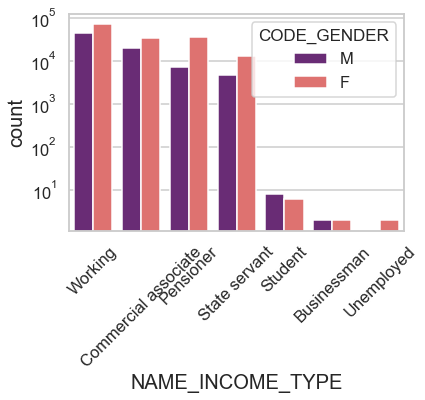

In [334]:
univariate_plot(df = app_data_target_0,column_name='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

#### Observation of the above plot
    1) Majority of customers taking good loans are in the income type Working,  Customer Associate and State Servant
    2) Least no of customers taking good loans belong to income type Student, Pensioner and Businessman

In [335]:
app_data_target_0.NAME_CONTRACT_TYPE.value_counts()

Cash loans         205270
Revolving loans     21013
Name: NAME_CONTRACT_TYPE, dtype: int64

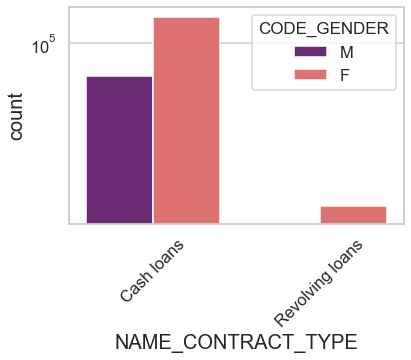

In [336]:
univariate_plot(app_data_target_0,column_name ='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

#### Observation from the above plot
        1) Female customers opting for Cash Loans are more likely to settle the loan
        2) No of male customers opting for good Revolving loans are almost zero

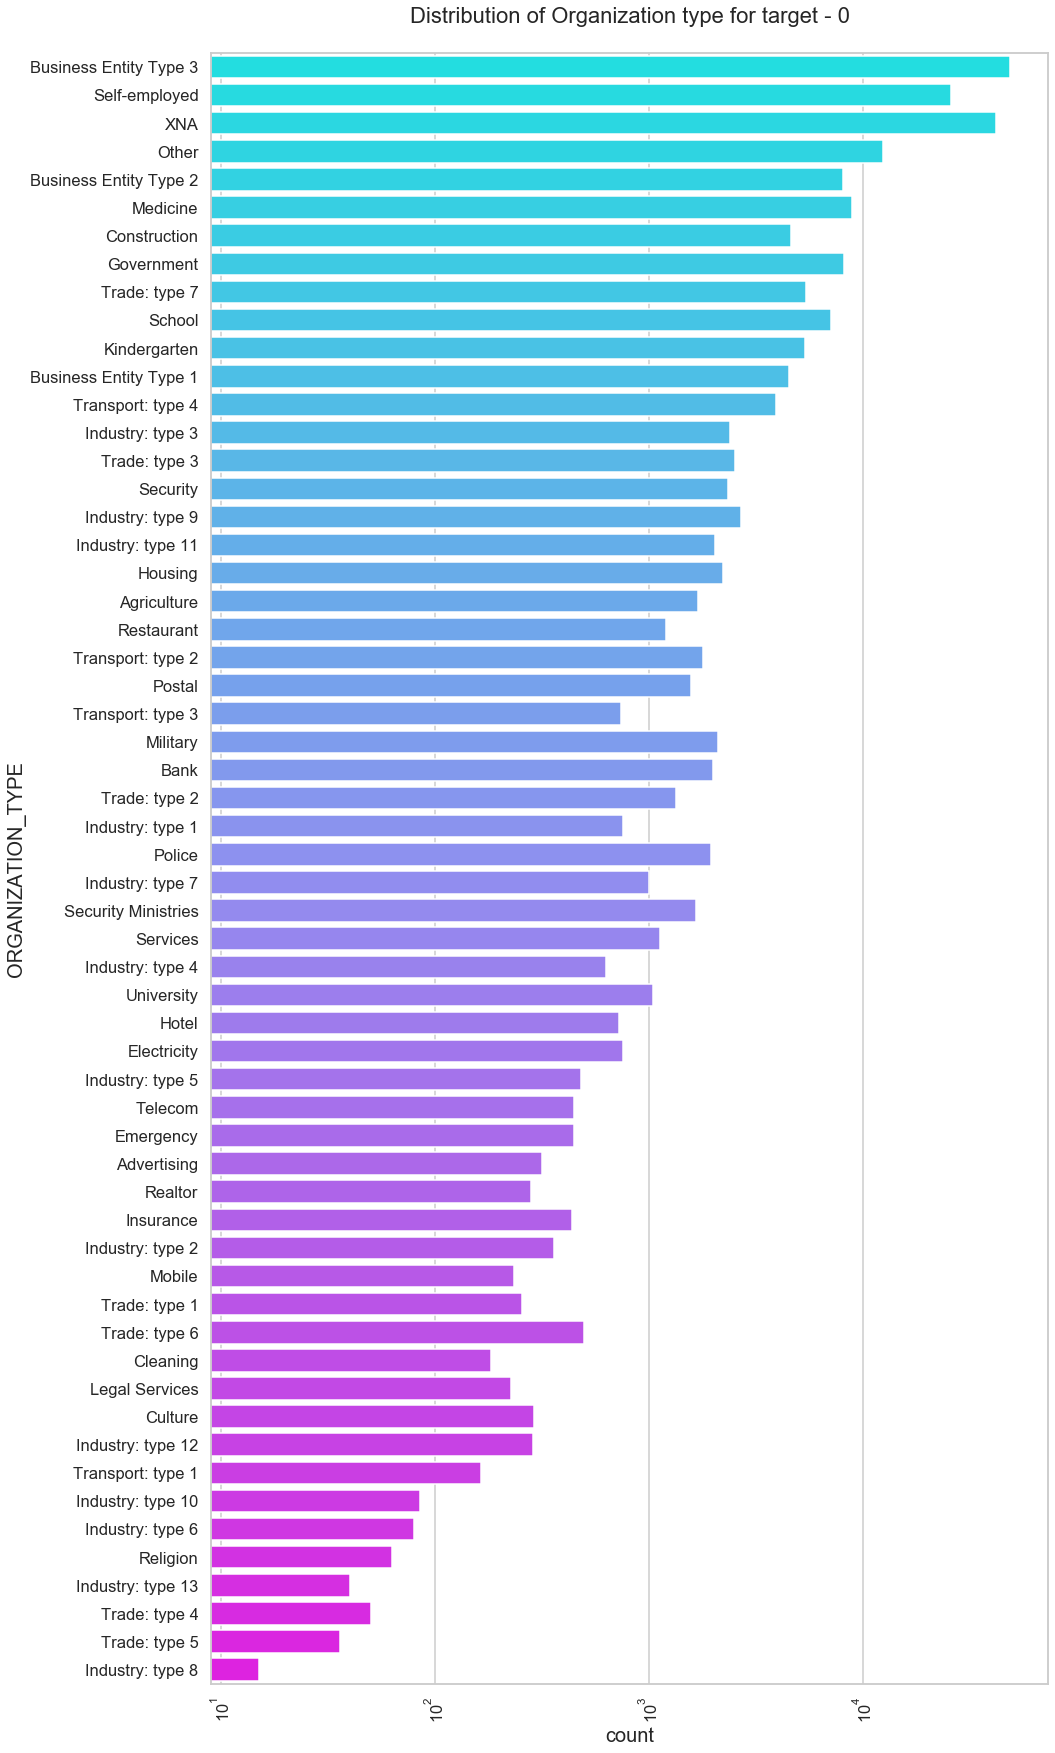

In [337]:
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.title("Distribution of Organization type for target - 0")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=app_data_target_0,y='ORGANIZATION_TYPE',order=app_data_target_1['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

#### Observation from above plot
1) Clients which have applied for loans are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Business entity Type 2’.
2) Less clients are from Industry type 4, Industry type 13, religion and trade type 5, type 4.

In [338]:
app_data_target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-250000
19,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,-161.0,0.0,0.0,0.0,0.0,2.0,2.0,100000-150000
30,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0,200000-250000
31,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,1,0,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,-1480.0,0.0,0.0,0.0,0.0,0.0,2.0,100000-150000
63,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,-4199,1,0,0,1,0,0,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000


#### Bivariate Analysis

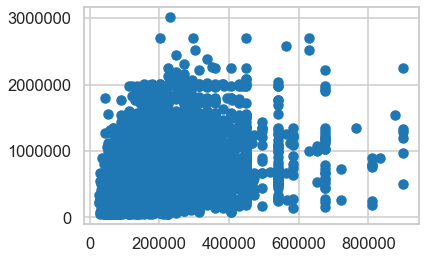

In [339]:
# Numerical to Numerical
plt.scatter(app_data_target_1.AMT_INCOME_TOTAL, app_data_target_1.AMT_CREDIT)

#### Observation from the above plot
    Nothing conclusive from the above plot

In [340]:
app_data_target_1[['AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr()

,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_CREDIT
AMT_GOODS_PRICE,1.000000,0.346038,0.982771
AMT_INCOME_TOTAL,0.346038,1.000000,0.343269
AMT_CREDIT,0.982771,0.343269,1.000000


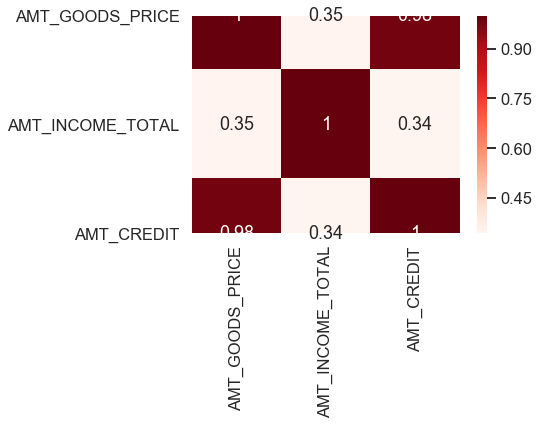

In [341]:
sns.heatmap(app_data_target_1[['AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']].corr(), annot=True, cmap='Reds')

#### Observation from the above plot
    1) An obvious observation: More the price of the goods more will be the credit amount
    2) There's not much association between rest of the variables.


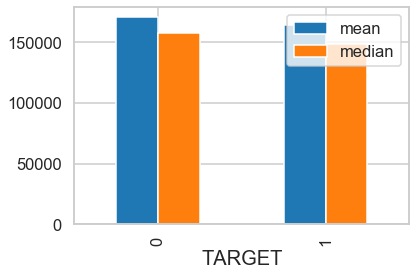

In [342]:

app_data.groupby('TARGET')['AMT_INCOME_TOTAL'].aggregate(['mean', 'median']).plot.bar()

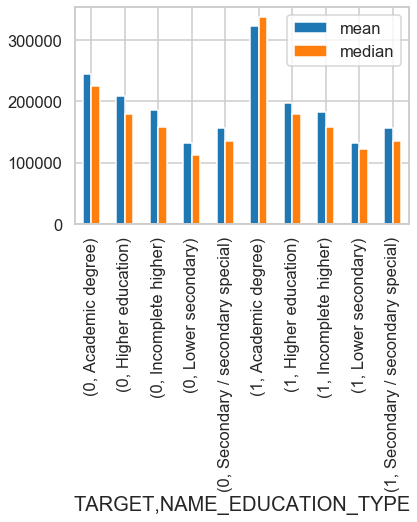

In [343]:
app_data.groupby(['TARGET','NAME_EDUCATION_TYPE'])['AMT_INCOME_TOTAL'].aggregate(['mean', 'median']).plot.bar()

#### Observation from the above plot
    1)Looks like high earning and academic degree holders are more vulnerable to default
    2) Also the same category of customers(high earning and academic degree holders) are the ones who settle their loans most

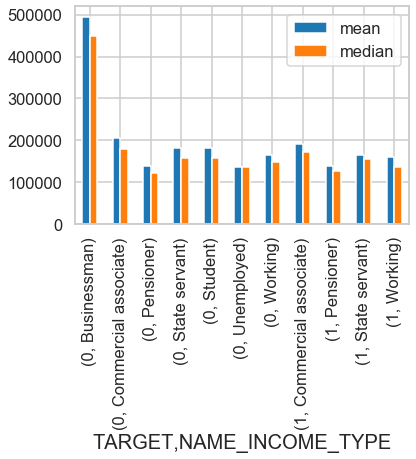

In [344]:
app_data.groupby(['TARGET','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].aggregate(['mean', 'median']).plot.bar()

Observation from the above plot
1) Looks like high earning and businessman are the one who mostly settle their loans
2) Also the less earning working class customers are more vulnerable to default

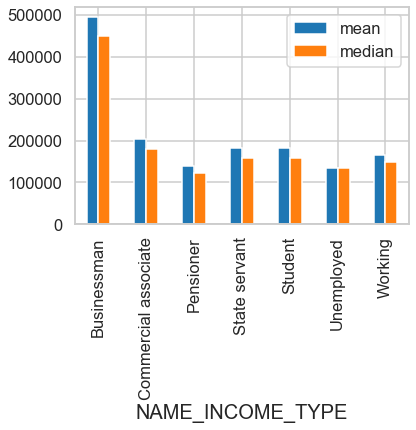

In [345]:
app_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].aggregate(['mean', 'median']).plot.bar()

#### Import previous application data

In [346]:
prev_app_data = pd.read_csv("C:\\Users\\shrivaa7\\Desktop\\Personal\\Upgrad\\CaseStudy\\previous_application.csv")
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [347]:
prev_app_data.shape


(1670214, 37)

In [348]:
columns_null_percentage = (prev_app_data.isnull().sum() / len(prev_app_data.index)) * 100
columns_null_percentage_greater_than_30 = columns_null_percentage[columns_null_percentage.values > 30]
columns_null_percentage_greater_than_30

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [349]:
len(columns_null_percentage_greater_than_30)

11

In [350]:
# Dropping columns where null values percentage is greater than 30%
list_of_columns_to_drop = list(columns_null_percentage_greater_than_30.index)
prev_app_data.drop(list_of_columns_to_drop, axis=1, inplace = True)

In [351]:
prev_app_data.shape

(1670214, 26)

In [352]:
col_null_per = (prev_app_data.isnull().sum()/len(prev_app_data.index)) * 100
col_null_per[col_null_per.values > 0]

AMT_ANNUITY            22.286665
AMT_CREDIT              0.000060
AMT_GOODS_PRICE        23.081773
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
dtype: float64

In [353]:
prev_app_data.AMT_ANNUITY.describe().apply(lambda x: format(x, 'f'))

count    1297979.000000
mean       15955.120659
std        14782.137335
min            0.000000
25%         6321.780000
50%        11250.000000
75%        20658.420000
max       418058.145000
Name: AMT_ANNUITY, dtype: object

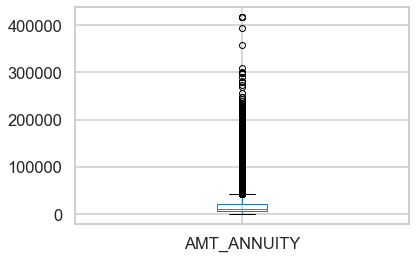

In [354]:
prev_app_data.boxplot(column = 'AMT_ANNUITY')   

In [355]:
prev_app_data.AMT_ANNUITY.quantile([0.5, 0.7, 0.8, 0.9, 0.95,.99])

0.50    11250.0000
0.70    17783.1270
0.80    23638.5000
0.90    34703.8200
0.95    45336.7800
0.99    69685.7886
Name: AMT_ANNUITY, dtype: float64

In [356]:
# impute null values with  mean
prev_app_data.AMT_ANNUITY.fillna(prev_app_data.AMT_ANNUITY.mean(), inplace = True)

In [357]:
prev_app_data.AMT_ANNUITY.isnull().sum()

0

In [358]:
prev_app_data.AMT_GOODS_PRICE.describe().apply(lambda x: format(x, 'f'))


count    1284699.000000
mean      227847.279283
std       315396.557937
min            0.000000
25%        50841.000000
50%       112320.000000
75%       234000.000000
max      6905160.000000
Name: AMT_GOODS_PRICE, dtype: object

In [359]:
prev_app_data.AMT_GOODS_PRICE.quantile([0.5, 0.7, 0.8, 0.9, 0.95,.99])

0.50     112320.0
0.70     211500.0
0.80     315000.0
0.90     585000.0
0.95     900000.0
0.99    1395000.0
Name: AMT_GOODS_PRICE, dtype: float64

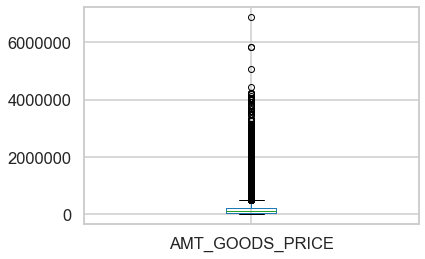

In [360]:
prev_app_data.boxplot(column = 'AMT_GOODS_PRICE') 

In [361]:
# imputing null values with mode as mean is skewed
prev_app_data.AMT_GOODS_PRICE.fillna(112320.0, inplace = True)

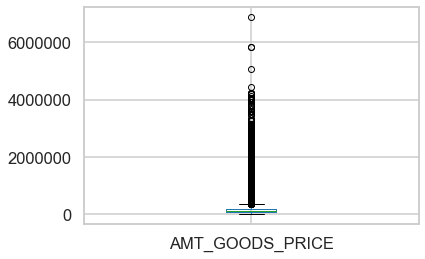

In [362]:
prev_app_data.boxplot(column = 'AMT_GOODS_PRICE') 

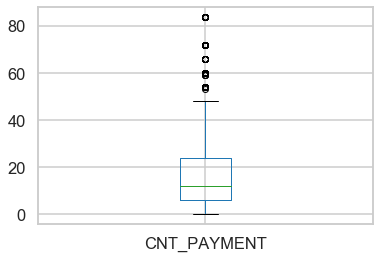

In [363]:
prev_app_data.boxplot(column = 'CNT_PAYMENT') 


In [364]:
prev_app_data.CNT_PAYMENT.describe().apply(lambda x: format(x, 'f'))

count    1297984.000000
mean          16.054082
std           14.567288
min            0.000000
25%            6.000000
50%           12.000000
75%           24.000000
max           84.000000
Name: CNT_PAYMENT, dtype: object

In [365]:
# imputing null values with mode as mean is skewed
prev_app_data.CNT_PAYMENT.fillna(12, inplace = True)

In [366]:
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [367]:
round(prev_app_data.isnull().sum() / len(prev_app_data.index), 4) * 100

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                    0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_GOODS_PRICE                0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
CNT_PAYMENT                    0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

In [368]:
prev_app_data[prev_app_data.PRODUCT_COMBINATION.isnull()].head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6664,2515161,222844,XNA,15955.120659,0.0,0.0,112320.0,SATURDAY,8,Y,1,XAP,Canceled,-351,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,10,Connectivity,12.0,XNA,NaN
9029,1851920,417884,XNA,15955.120659,0.0,0.0,112320.0,MONDAY,13,Y,1,XAP,Canceled,-291,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,30,Connectivity,12.0,XNA,NaN
17038,2389511,148922,XNA,15955.120659,0.0,0.0,112320.0,TUESDAY,6,Y,1,XAP,Canceled,-395,XNA,XAP,New,XNA,XNA,XNA,Country-wide,20,Connectivity,12.0,XNA,NaN
24543,2494449,366626,XNA,15955.120659,0.0,0.0,112320.0,WEDNESDAY,13,Y,1,XAP,Canceled,-418,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,41,Connectivity,12.0,XNA,NaN
24574,2781877,394843,XNA,15955.120659,0.0,0.0,112320.0,SATURDAY,6,Y,1,XAP,Canceled,-601,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,42,Connectivity,12.0,XNA,NaN


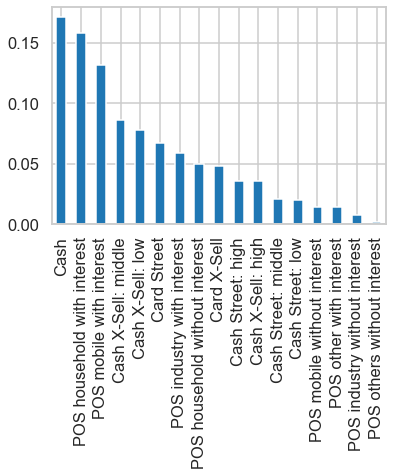

In [369]:
prev_app_data.PRODUCT_COMBINATION.value_counts(normalize = True).plot.bar()

In [370]:
prev_app_data.PRODUCT_COMBINATION.fillna('Cash', inplace = True)

In [371]:
prev_app_data.isnull().sum() / len(prev_app_data.index) * 100

SK_ID_PREV                     0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_TYPE             0.00000
AMT_ANNUITY                    0.00000
AMT_APPLICATION                0.00000
AMT_CREDIT                     0.00006
AMT_GOODS_PRICE                0.00000
WEEKDAY_APPR_PROCESS_START     0.00000
HOUR_APPR_PROCESS_START        0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
NAME_CASH_LOAN_PURPOSE         0.00000
NAME_CONTRACT_STATUS           0.00000
DAYS_DECISION                  0.00000
NAME_PAYMENT_TYPE              0.00000
CODE_REJECT_REASON             0.00000
NAME_CLIENT_TYPE               0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_PORTFOLIO                 0.00000
NAME_PRODUCT_TYPE              0.00000
CHANNEL_TYPE                   0.00000
SELLERPLACE_AREA               0.00000
NAME_SELLER_INDUSTRY           0.00000
CNT_PAYMENT                    0.00000
NAME_YIELD_GROUP               0.00000
PRODUCT_COMBINATION      

In [372]:
prev_app_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [373]:
prev_app_data[prev_app_data.NAME_CONTRACT_TYPE == 'XNA'].head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6664,2515161,222844,XNA,15955.120659,0.0,0.0,112320.0,SATURDAY,8,Y,1,XAP,Canceled,-351,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,10,Connectivity,12.0,XNA,Cash
9029,1851920,417884,XNA,15955.120659,0.0,0.0,112320.0,MONDAY,13,Y,1,XAP,Canceled,-291,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,30,Connectivity,12.0,XNA,Cash
17038,2389511,148922,XNA,15955.120659,0.0,0.0,112320.0,TUESDAY,6,Y,1,XAP,Canceled,-395,XNA,XAP,New,XNA,XNA,XNA,Country-wide,20,Connectivity,12.0,XNA,Cash
24543,2494449,366626,XNA,15955.120659,0.0,0.0,112320.0,WEDNESDAY,13,Y,1,XAP,Canceled,-418,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,41,Connectivity,12.0,XNA,Cash
24574,2781877,394843,XNA,15955.120659,0.0,0.0,112320.0,SATURDAY,6,Y,1,XAP,Canceled,-601,XNA,XAP,Repeater,XNA,XNA,XNA,Country-wide,42,Connectivity,12.0,XNA,Cash


In [374]:
prev_app_data.loc[prev_app_data['NAME_CONTRACT_TYPE'] == 'XNA', 'NAME_CONTRACT_TYPE'] = 'Cash loans'

In [375]:
prev_app_data.NAME_CASH_LOAN_PURPOSE.value_counts(normalize = True)*100
# XAP and  XNA are quite large in number; lets impute these with 'Other' rather than any other reason

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

In [376]:
prev_app_data['NAME_CASH_LOAN_PURPOSE'] = np.where(prev_app_data['NAME_CASH_LOAN_PURPOSE'] == 'XNA' , 'Other',prev_app_data['NAME_CASH_LOAN_PURPOSE'])

In [377]:
prev_app_data['NAME_CASH_LOAN_PURPOSE'] = np.where(prev_app_data['NAME_CASH_LOAN_PURPOSE'] == 'XAP' , 'Other',prev_app_data['NAME_CASH_LOAN_PURPOSE'])

In [378]:
prev_app_data['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize = True)

Other                               0.967653
Repairs                             0.014229
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby                               0.000033
Money for a third person            0.000015
Refusal to

In [379]:
merged_df = pd.merge(app_data, prev_app_data, left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR', how = 'left')

In [380]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-250000,1038818.0,Consumer loans,9251.775000,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,Other,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000,1564014.0,Consumer loans,5357.250000,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,Other,Approved,-815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,50000-100000,2218188.0,Consumer loans,17885.835000,162598.5,162598.5,162598.5,THURSDAY,10.0,Y,1.0,Other,Approved,-370.0,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,110.0,Consumer electronics,10.0,low_normal,POS household with interest
3,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,50000-100000,1757431.0,Cash loans,15955.120659,0.0,0.0,112320.0,FRIDAY,18.0,Y,1.0,Other,Canceled,-82.0,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1.0,XNA,12.0,XNA,Cash
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,50000-100000,1186888.0,Consumer loans,8019.090000,44455.5,39955.5,

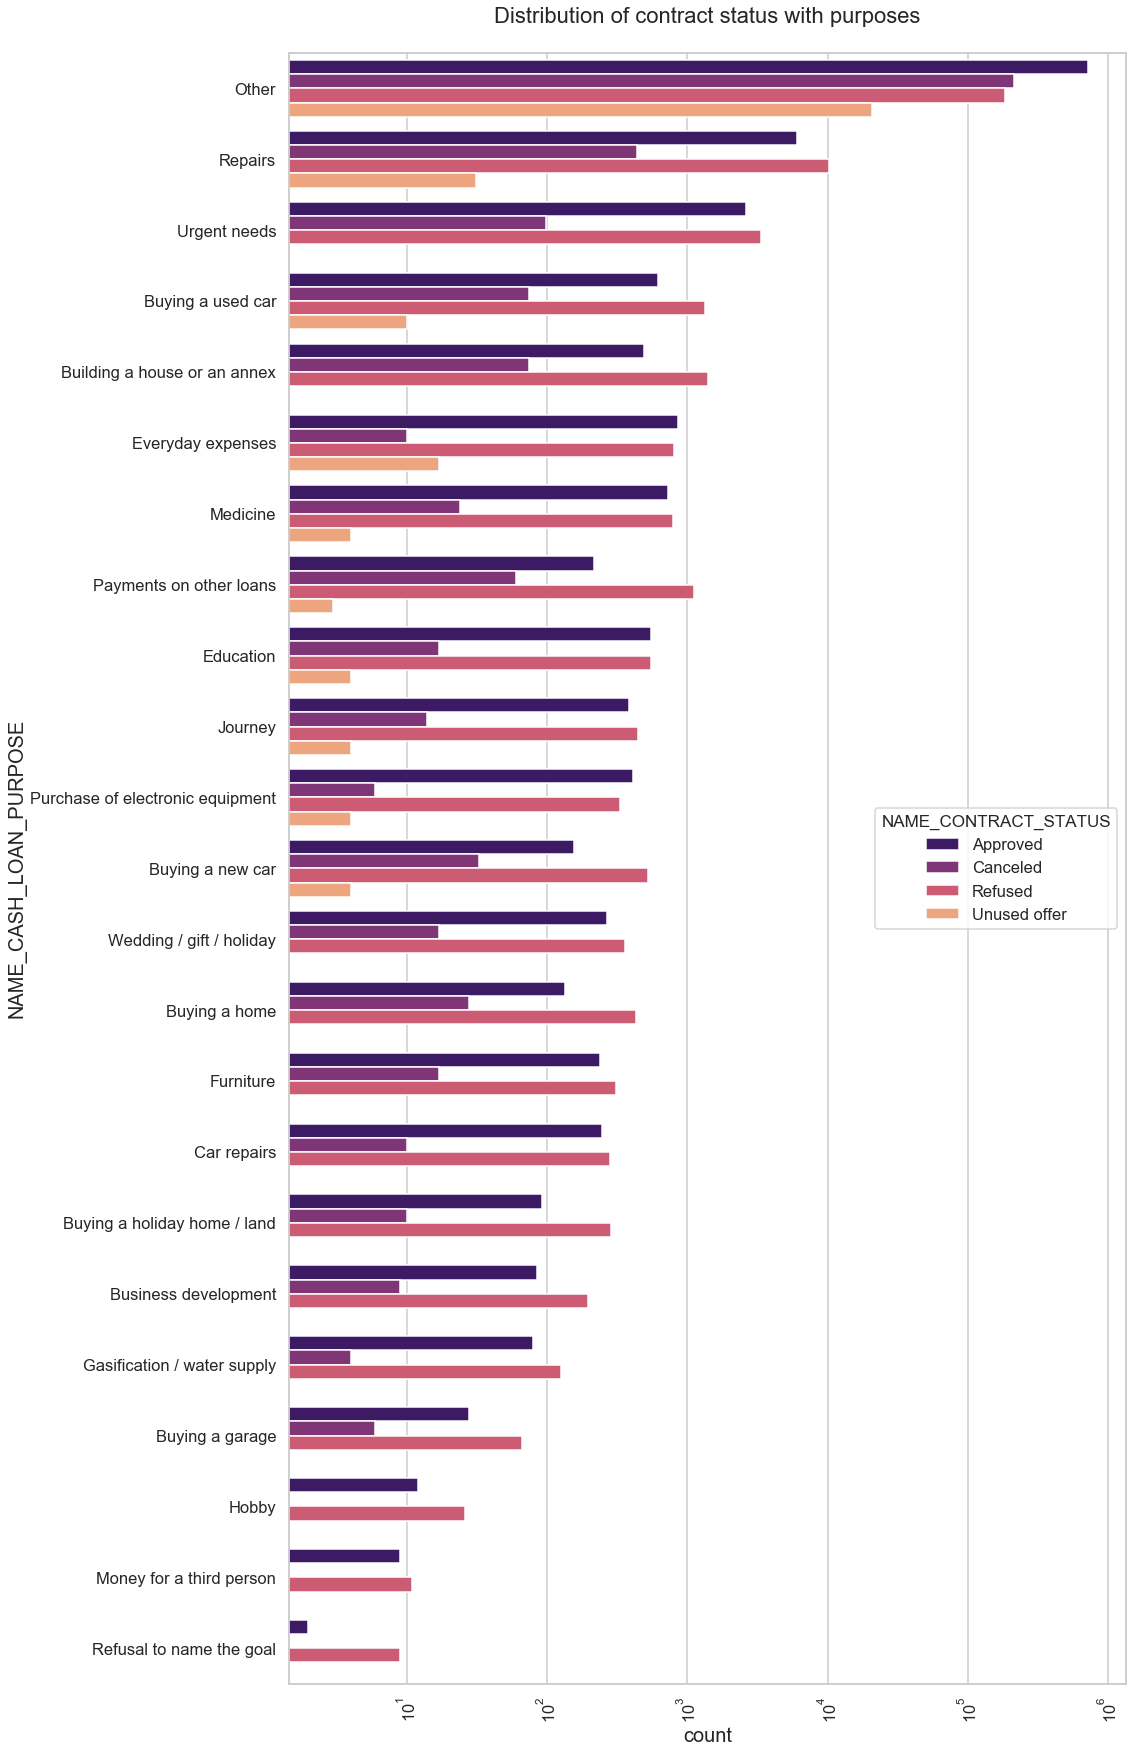

In [381]:

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = merged_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

##### Observation from the above plot

1) Most rejection of loans came from purpose 'Other' followed by 'Repairs' and 'Urgent Needs'


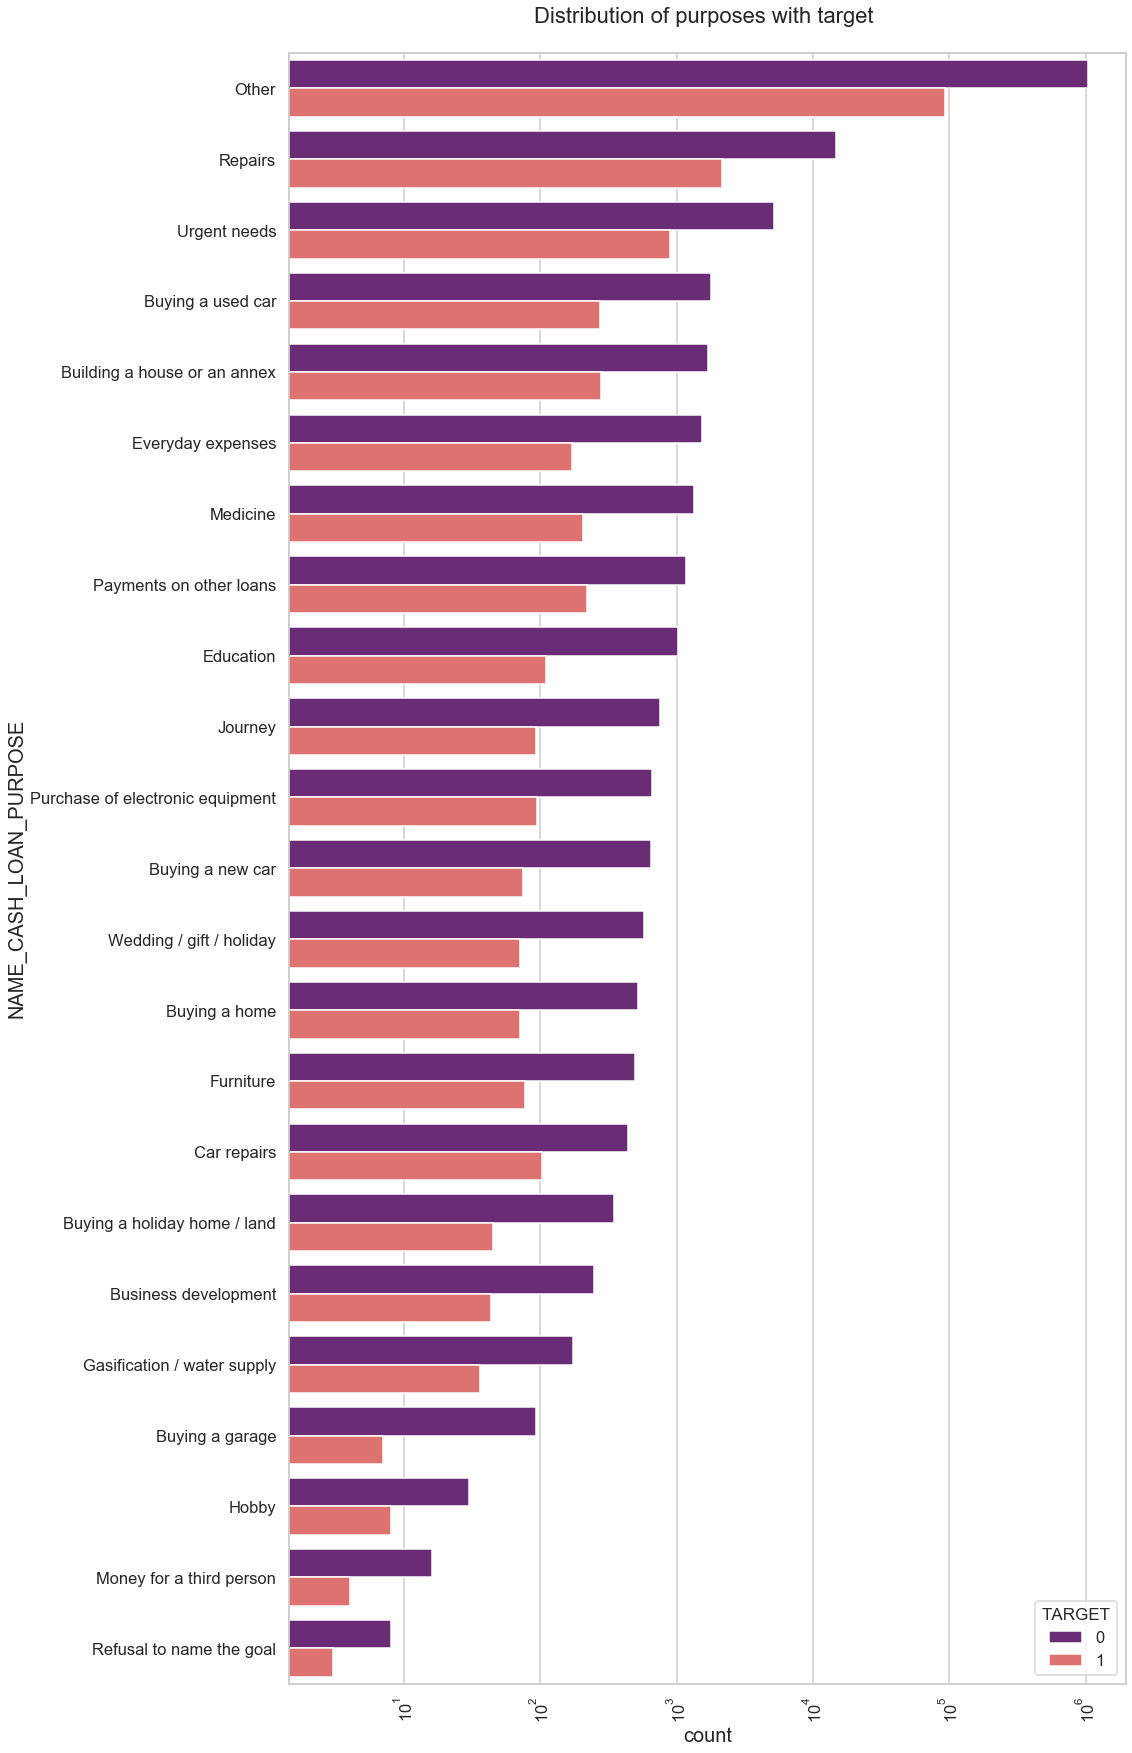

In [382]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merged_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

#### Observation from the above plot
1) Loan purposes with 'Others' are facing more difficulites in payment on time.
2) There are few reasons where success rate is significantly higher than default rate - Buying a garage, Money for Third Person, Refusal to name the goal

In [383]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,200000-250000,1038818.0,Consumer loans,9251.775000,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,Other,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000,1564014.0,Consumer loans,5357.250000,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,Other,Approved,-815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,50000-100000,2218188.0,Consumer loans,17885.835000,162598.5,162598.5,162598.5,THURSDAY,10.0,Y,1.0,Other,Approved,-370.0,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,110.0,Consumer electronics,10.0,low_normal,POS household with interest
3,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,50000-100000,1757431.0,Cash loans,15955.120659,0.0,0.0,112320.0,FRIDAY,18.0,Y,1.0,Other,Canceled,-82.0,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1.0,XNA,12.0,XNA,Cash
4,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,50000-100000,1186888.0,Consumer loans,8019.090000,44455.5,39955.5,

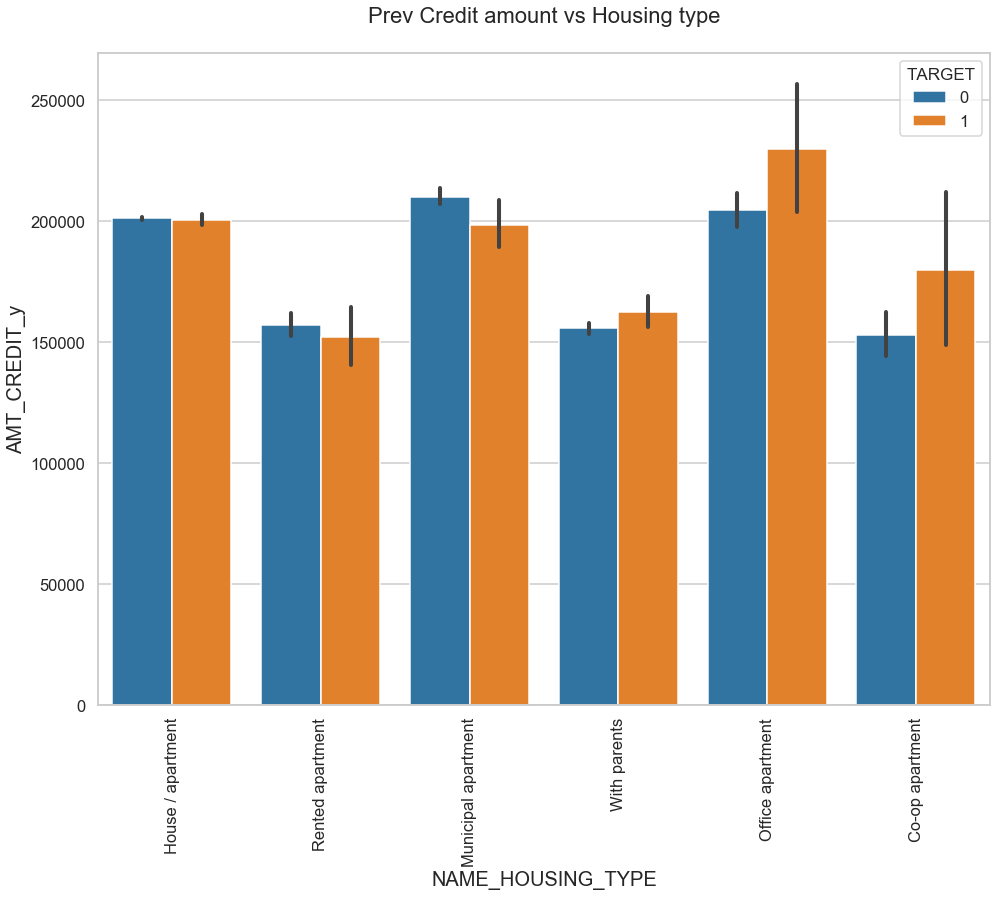

In [384]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =merged_df, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

#### Observation from the above plot
1) Loan taken for Municipal apartment are more likely to pay the loan
2) Loan taken for Office apartment are more less likely to pay the loan